# Classification Metrics

## Confusion Matrix

Besides raw accuracy, there are several other ways to evaluate the performance of a model each of which provide unique insights to avoid class imbalance effects. For example, if a class is simply more dominant, rigid classification on that one class might high accuracy, but will suffer in other performance metrics. With this in mind, we can obtain a more well-painted picture on how well a classifier performed.

A confusion matrix, or error matrix summarize the extend to which a model is 'confusing' two or more classes. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class.

In the case of a binary classifier we can have the following:

<img src="../../assets/evaluation/binary_confusion_matrix.png" style="width: 500px;"/>

**For Example**

Suppose we have the following binary confusion matrix within the context of an email spam classifier:

\begin{bmatrix}
    1098 & 93 \\
    44 & 472
\end{bmatrix}

From this matrix, we obtain the following information:

* True negatives = 1098
* False positives = 93
* False negatives = 44
* True positives = 472

**Interpretation**: 
* Every set is disjoint, so there are a total of $1098 + 93 + 44 + 472 = 1707$ classifications
* $1098$ were correctly classified as not spam
* $472$ were correctly classified as spam
* $93$ were incorrectly classified as spam
* $44$ were incorrectly classified as not spam


This idea is generalized for n classes, as in the following example for digit classification.

In [17]:
import numpy as np
from os.path import join
from myutils.config import config
from mlxtend.data import loadlocal_mnist


data_root = join(config['data_dir'], 'digits v2')
X_train, y_train = loadlocal_mnist(images_path=join(data_root, 'train-images.idx3-ubyte'), 
                                   labels_path=join(data_root, 'train-labels.idx1-ubyte'))
X_test, y_test = loadlocal_mnist(images_path=join(data_root, 't10k-images.idx3-ubyte'), 
                                 labels_path=join(data_root, 't10k-labels.idx1-ubyte'))


shuffle_index_train = np.random.permutation(X_train.shape[0])
shuffle_index_test = np.random.permutation(X_test.shape[0])

X_train, y_train = X_train[shuffle_index_train], y_train[shuffle_index_train]
X_test, y_test = X_test[shuffle_index_test], y_test[shuffle_index_test]


def l(d, limit=.10):
    """
    obj: subset for fast demonstration purposes
    """
    try:
        return d[:int(d.shape[0]*limit), :]
    except IndexError:
        return d[:int(d.shape[0]*limit)]
        
X_train, y_train = l(X_train), l(y_train)
X_test, y_test = l(X_test), l(y_test)

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.861

Text(33.0, 0.5, 'Predicted Label')

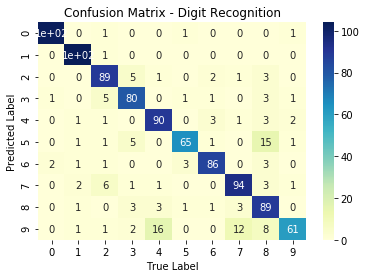

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
c_names = [str(i) for i in range(10)]

ax = plt.axes()
df_cm = pd.DataFrame(cm, index = c_names, columns = c_names)
sn.heatmap(df_cm, annot=True, cmap="YlGnBu", ax=ax)
ax.set_title('Confusion Matrix - Digit Recognition')
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')

## Classification Report

The confusion matrix alone is a frequency matrix. From the above confusion matrix, we can identify where the classifier is having trouble. Misclassification with "8"s tend to be pretty common, and in particular it misclassifies the most with "5"s. This makes sense because these numbers share many of the same representative attributes.

If we want a wholistic summary of a classifiers performance, we look at several other metrics that are summarized within the classification report. This report will identify all the different types ways a classifier can be correct or incorrect.

1. If you are wrong, you can be wrong in two ways. First, it isn't when you say it is. Second, it is when you say it isn't.
2. If you are right, you can be right in two ways. First, it isn't and you say it isn't. Second, it is and you say it is.

For example, if my positive class is a 5 then using a one-vs-rest approach, I can fall under the follow categories. Using this approach, we can defined precision and recall for multilevel classifications.

1. TP: classification is a 5, and prediction is a 5.
2. TN: classification is not a 5, and prediction is a 5.
3. FP: classfication is a 5, and prediction is not a 5.
4. FN: classfication is not a 5, and prediction is a 5.


In [20]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       106
           1       0.94      0.99      0.96       105
           2       0.84      0.88      0.86       101
           3       0.83      0.87      0.85        92
           4       0.81      0.89      0.85       101
           5       0.92      0.73      0.81        89
           6       0.91      0.90      0.91        96
           7       0.85      0.87      0.86       108
           8       0.70      0.88      0.78       101
           9       0.91      0.60      0.73       101

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



**Precision**

Precision, or positive predictive value, measures the proportion of correct positive classifications over all positive classifications. This is useful because it tells us that if we condition on a particular class (say 5), how many did the classifier get correct here?

$$\text{precision} = \frac{TP}{TP + FP} $$


**Recall / Sensativity**

The true positive rate, measures the proportion of positive classifications that are correct when also considering in incorrect negative classifications. This is useful because now if we instead condition on all the predictions that were of a particular class (say 5), regardless if they were wrong or right, we are now many predictions were correct.

$$\text{recall} = \frac{TP}{TP + FN} $$


**F1-Score**

The weighted mean of precision in and recall. The idea here is that we want to have a way of interpreting both the precision and recall metrics into a single number to interpret the overall performance of a classifier. F1-score attempt to do this by favoring a higher score towards a particular classfication only if precision and recall are both high.

$$\text{F1-score} = 2 * \frac{\text{precision}*\text{recall}}{\text{precision}+\text{recall}}$$.


/Users/danielm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


/Users/danielm/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


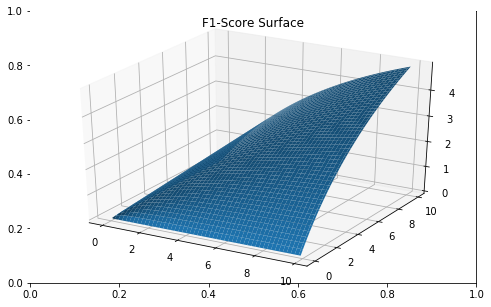

In [21]:
from myutils.draw.math import plt_3d_functions
import numpy as np

plt_3d_functions([lambda x, y: (x*y)/(x+y)], np.arange(0, 10, .1), np.arange(0, 10, .1),
                  title="F1-Score Surface", fig_size=(8, 5))

As we can see, an optimal f1-score is favored for a precision and recall that are similiar in value. If either are zero, f1 is zero. Additionally, recall is not favored over precision - so that graph reflects its symmetry in this way.

There are cases where you might prefer to have a higher recall over precision, or the other way around. For example, in medical testing for cancer, false postives (you dont have cancer when you do) are valued much high any other metric. In this way, precision would weighted as the more important metric of choice.



## The Precision Recall Trade Off

For classification based tasks, a classification is determined through a decision function. If the decision for the function is greater than some threshold, then the classfication is type A, or it is not.

The only way we can affect the precision and recall ratios is by adjusting the threshold of the decision function. However, any decrease or increase of this threshold would result in an opposite trade off on the mirroring metric.

**What Threshold Should I Chose?**

To answer this question, we must first understand the trade relationship between precision and recall ratios by varying the threshold of the decision function.

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict


# sample PR curve for class 0
y_test_one_vs_rest = label_binarize(y_test, classes=list(range(10)))
y_score = cross_val_predict(OneVsRestClassifier(sgd_clf), X_test, y_test, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_test_one_vs_rest[:, 0], y_score[:, 0])

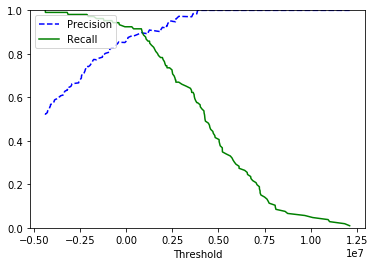

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    # [:-1] in order to be inline within the same dim as thresholds
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

While increasing the threshold increases the precision, the recall decreases. What about precision vs recall? Here, the dimension for threshold is hidden, but it asks as the glue between precision and recall.

Text(0.5, 1.0, 'Precision vs Recall - Classification for Digit 0')

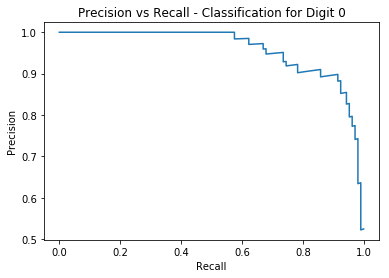

In [24]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall - Classification for Digit 0")

Generally, a good approach for identifying the best threshold would be by identifying the steepest tangent slope in the PR curve. This point identifies where precision is jointly maximized before recall descends down too quickly. But again, the threshold itself depends on the project and what exactly you are willing to give up.


## ROC Curves

ROC curves are similiar to PR curves, but ROC plots the true positive rate over the false positive rate. Since the `false positive rate = 1 - true negative rate`, or `1 - specificity`, and recall is AKA `sensativity`, ROC plots sensativity over `1 - specificity`.

To build an roc curve, only two pieces of information is needed:
* The true labels
* The classification metric (which could be any range of values including probability which is the most common).

ROC and PR curves are both viable metrics to compare the classfication performance of several different classifiers.

### Plotting ROC Curves

The dotted line represents a truely random binary classfication. A random classifier would have an auc (area under of the curve of .5, and a perfect classifier would have an auc of 1).

#### Manually

In [25]:
import numpy as np
import matplotlib.pyplot as plt



def roc_auc(y_test, pos_prob):
    """
    objective: return x, y values as true positive over false positive rate.
    :param y_test: np.array of true binary classifications
    :param post_prob: np.array of the probabilities (0 to 1) of positive classification for y_test
    we can actually avoid having this constraint, but I am keeping it for simplicity
    """
    ts = np.arange(0.0, 1.2, 0.1)
    true_pos, false_pos = np.zeros((1, len(ts))), np.zeros((1, len(ts)))
    
    for pred, y in zip(pos_prob, Y_test):
        # for each threshold, count the number of true and false positives respectively
        for i, t in enumerate(ts):
            # count correct
            if pred >= t and y == 1:
                true_pos[i] += 1
            # count incorrect
            elif pred >= t and y == 0:
                false_pos[i] += 1
            # otherwise pred < t, dont bother enumerating the rest
            # since next t will also be > pred
            else:
                break

    n_pos, n_neg = len(y_test[y_test==1]), len(y_test[y_test==0])
    true_pos_rate, false_pos_rate = np.divide(true_pos, n_pos), np.divide(false_pos, n_neg)
    return true_pos_rate, false_pos_rate


#### API

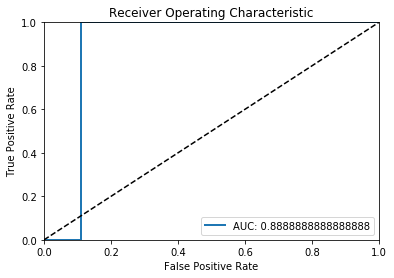

In [26]:
from sklearn.metrics import roc_curve
from myutils.draw.rocpr import plot_binary_roc_curve

plot_binary_roc_curve(y_test_one_vs_rest[0,:], y_score[0,:])